In [1]:
import pyECLAT
import numpy as np
import pandas as pd
import plotly

In [2]:
from pyECLAT import Example2
dataset = Example2().get()
dataset.head()

,0,1,2,3,4,5,6
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3001 non-null   object
 1   1       2315 non-null   object
 2   2       1774 non-null   object
 3   3       1374 non-null   object
 4   4       1048 non-null   object
 5   5       775 non-null    object
 6   6       581 non-null    object
dtypes: object(7)
memory usage: 164.2+ KB


In [4]:
from pyECLAT import ECLAT
eclat = ECLAT(data=dataset)
eclat.df_bin

,fresh tuna,cider,meatballs,magazines,cake,napkins,energy drink,blueberries,burgers,mayonnaise,...,low fat yogurt,gluten free bar,energy bar,tomato sauce,water spray,chocolate,oil,salad,almonds,carrots
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2999,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
items_total = eclat.df_bin.astype(int).sum(axis=0)
items_total

fresh tuna     77
cider          39
meatballs      65
magazines      18
cake          231
             ... 
chocolate     485
oil            71
salad          10
almonds        52
carrots        32
Length: 119, dtype: int64

In [6]:
items_per_transaction = eclat.df_bin.astype(int).sum(axis=1)
items_per_transaction

0       7
1       3
2       1
3       2
4       5
       ..
2996    1
2997    2
2998    3
2999    7
3000    5
Length: 3001, dtype: int64

In [7]:
import pandas as pd
df = pd.DataFrame({'items': items_total.index, 'transactions': items_total.values}) 
df_table = df.sort_values("transactions", ascending=False)
df_table.head(5).style.background_gradient(cmap='Blues')

,items,transactions
36,mineral water,711
56,spaghetti,549
22,eggs,532
114,chocolate,485
92,french fries,463


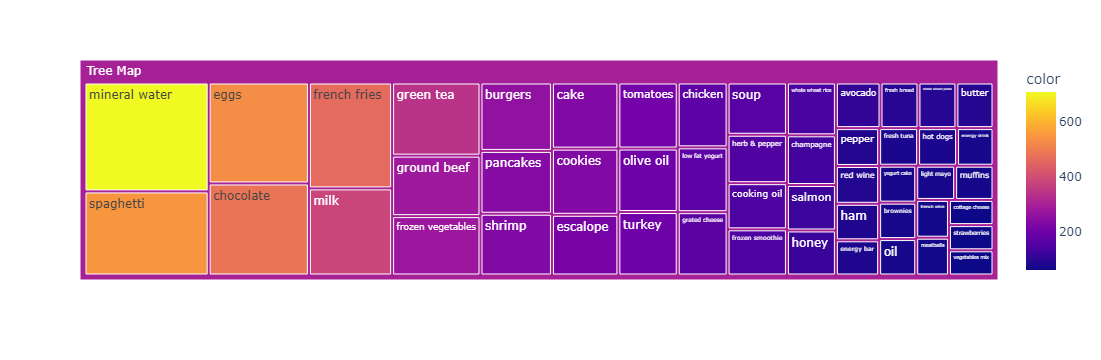

In [14]:
import plotly.express as px
df_table["all"] = "Tree Map"
fig = px.treemap(df_table.head(50), path=['all', "items"], values='transactions',
                  color=df_table["transactions"].head(50),
                )
fig.show()

In [ ]:
min_support = 5/100
min_combination = 2
max_combination = max(items_per_transaction)
rule_indices, rule_supports = eclat.fit(min_support=min_support,
                                                 min_combination=min_combination,
                                                 max_combination=max_combination,
                                                 separator=' & ',
                                                 verbose=True)

In [ ]:
import pandas as pd
result = pd.DataFrame(rule_supports.items(),columns=['Item', 'Support'])
result.sort_values(by=['Support'], ascending=False)